# Problem statement 

Prepare a classification model using the Naive Bayes algorithm for the salary dataset. Train and test datasets are given separately. Use both for model building. And predict Salary

**Note : Do the Deployment by using Streamlit Framework**

**Business Objective**
Maximize the accuracy of salary predictions for employees.

**Constraints**
Minimize the mistake when deciding the salaries 

## Success Criteria
* **Business Success Criteria** → Ensure employees receive the correct salary.
* **Machine Learning Success Criteria** → Achieve at least 80% accuracy in salary prediction.
* **Economic Success Criteria** → Reduce the number of personnel needed for salary allocation.

### Dataset collection 
360DigiTMG Institute Private Limited provides separate training and testing datasets.

**Dataset Contains 14 columns and 30161 rows**

*About features*

| Feature Names   | Description                                       | Data Types                 | Measurement Level |
|----------------|---------------------------------------------------|----------------------------|-------------------|
| age           | Age of the employee.                              | Quantitative → Discrete    | Ratio            |
| workclass     | Type of employer (e.g., state government, private company). | Qualitative → Categorical | Nominal          |
| education     | Employee's highest level of education.            | Qualitative → Categorical  | Ordinal          |
| educationno   | Number representing education level.              | Quantitative → Discrete    | Ordinal          |
| maritalstatus | Marital status of the employee (e.g., married, single). | Qualitative → Categorical | Nominal          |
| occupation    | Type of job the employee does.                    | Qualitative → Categorical  | Nominal          |
| relationship  | Employee's role in the household (e.g., husband, wife). | Qualitative → Categorical | Nominal          |
| race         | Employee's ethnicity.                              | Qualitative → Categorical  | Nominal          |
| sex          | Gender of the employee.                            | Qualitative → Categorical  | Nominal          |
| capitalgain  | Extra money earned from selling assets (e.g., stocks, property). | Quantitative → Continuous | Ratio            |
| capitalloss  | Money lost when selling assets for less than their purchase price. | Quantitative → Continuous | Ratio            |
| hoursperweek | Number of hours the employee works per week.       | Quantitative → Continuous | Ratio            |
| native       | Employee's place of birth or nationality.          | Qualitative → Categorical  | Nominal          |
| Salary       | Employee's income category (e.g., above or below a certain amount). | Qualitative → Categorical | Nominal          |


**Import necessary libraries**

In [1]:
# Standard Libraries
import warnings  
import joblib  
import numpy as np  
import pandas as pd  

# Visualization Libraries
import matplotlib.pyplot as plt  
import seaborn as sns  

# Scikit-Learn Preprocessing & Pipeline
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder  
from sklearn.impute import SimpleImputer  
from sklearn.compose import ColumnTransformer  

# Custom Feature Transformation
from FeatureTransformation import FeatureMapping  

# Suppress Warnings  
warnings.filterwarnings('ignore')  

**Load the dataset into the variable**

In [2]:
df = pd.read_csv('SalaryData_Test.csv')

In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


**Data pre-processing**

In the data preprocessing stage, we need to check:

- Data type consistency (Type Casing)
- Duplicate values
- Missing values
- Number of unique values in each column
- Statistical summary of the dataset

**Type casting**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


**Don't change the type casting; all of them are correct**

**Missing values**

In [5]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

**There are no missing values in the dataset.**

**Duplicate values**

In [6]:
df.duplicated().sum()

930

**There are 3,258 duplicate rows in the dataset**

**Number of unique values in each column**

**Statistical summary of the dataset**

In [7]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


- The age of employees ranges from 17 to 90, with an average of 39. The age distribution shows moderate dispersion from the mean.
- Education level (educationno) ranges from 1 to 16, with an average of 10. The education level shows moderate dispersion from the mean.
- Capital gain ranges from 0 to 99,999, with an average of 1,215. The 25th, 50th, and 75th percentiles for capital gain are zero.
- Capital loss ranges from 0 to 4,356, with an average of 98. The 25th, 50th, and 75th percentiles for capital loss are zero.
- Employees work a minimum of 1 hour per week and a maximum of 99 hours, with an average of 12 hours. The hours-per-week distribution shows moderate dispersion from the mean.

In [8]:
# Take one copy of dataset 
dfCopy = df.copy()

**Bivaritate Analysis**

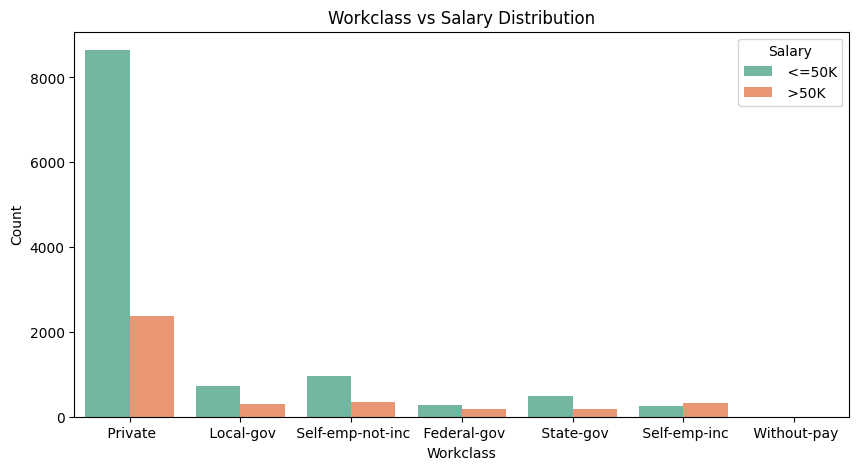

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'workclass', hue = 'Salary', palette = 'Set2')

plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass vs Salary Distribution')
plt.legend(title='Salary')

**In the private sector, a high salary is observed both for those earning less than 50K and those earning more than 50K.**

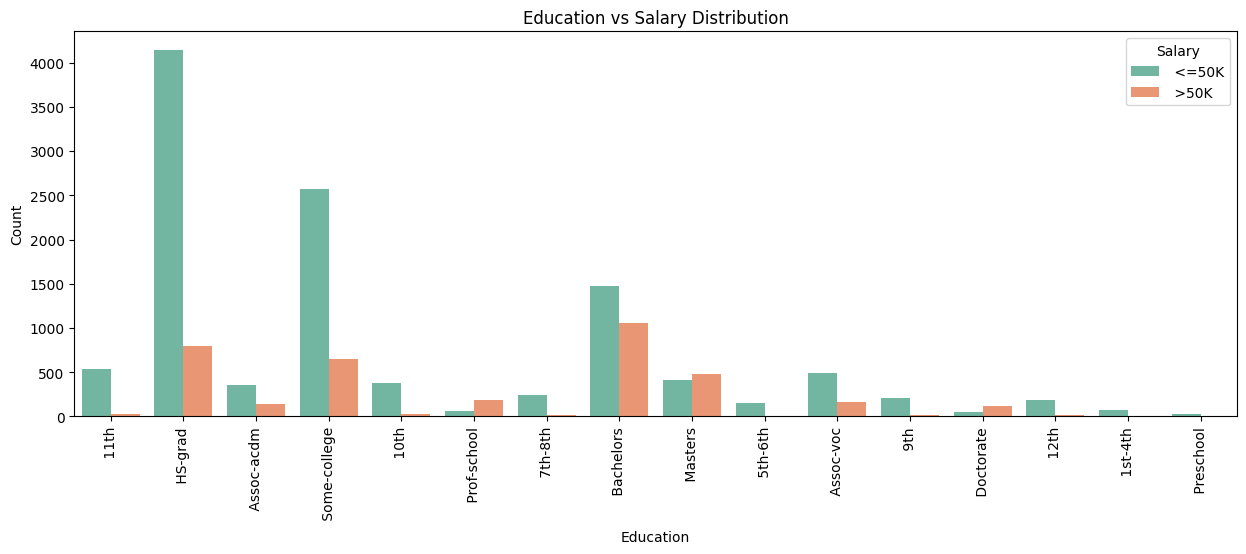

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(data = df, x = 'education', hue = 'Salary', palette = 'Set2')

plt.xlabel('Education')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Education vs Salary Distribution')
plt.legend(title='Salary')

**HS-grade employees receive high salaries in the less-than-50K category, while bachelor's degree holders receive high salaries in the greater-than-50K category**

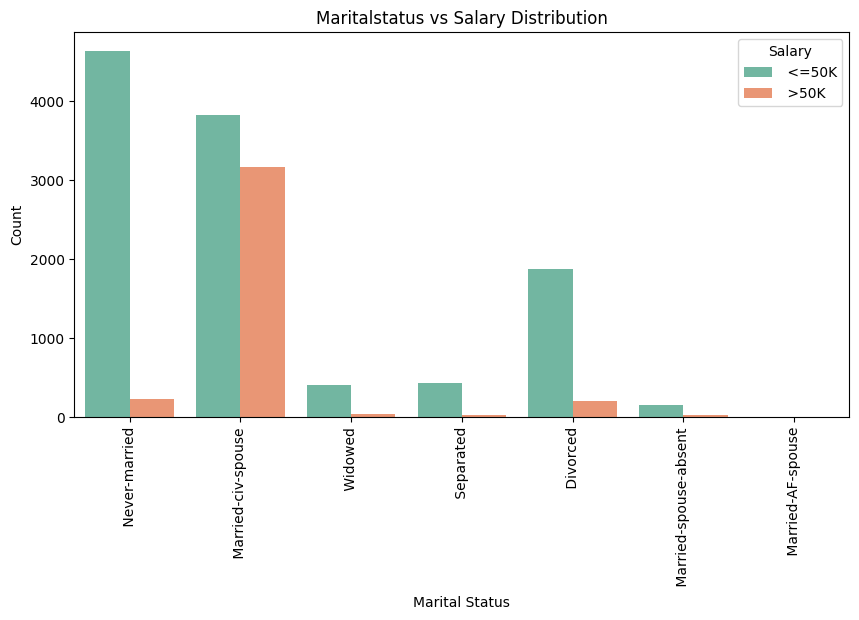

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'maritalstatus', hue = 'Salary', palette = 'Set2')

plt.xlabel('Marital Status')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Maritalstatus vs Salary Distribution')
plt.legend(title='Salary')

**Married-civ-spouse individuals earn higher salaries (greater than 50K) compared to others.**

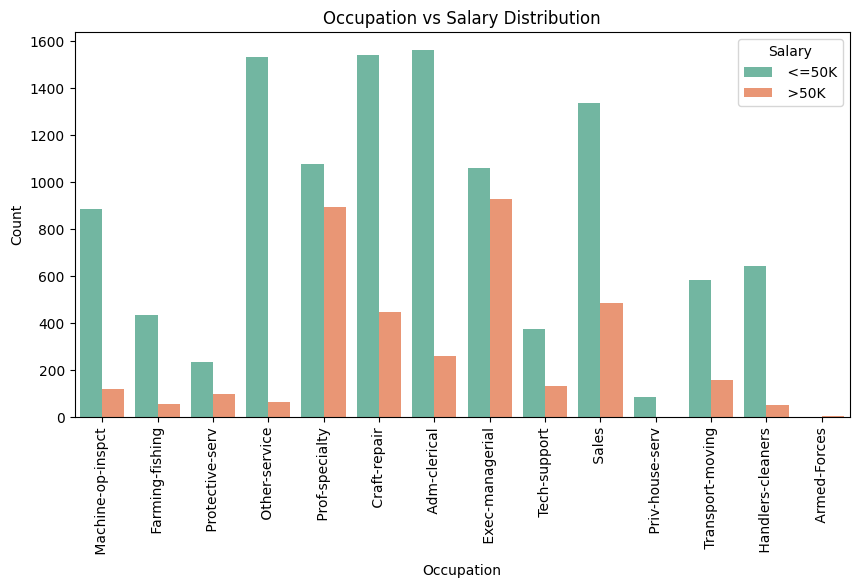

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'occupation', hue = 'Salary', palette = 'Set2')

plt.xlabel('Occupation')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Occupation vs Salary Distribution')
plt.legend(title='Salary')

**The exce-manageerical and prof-specialty earn higher salaries (greater than 50K) compared to others.**

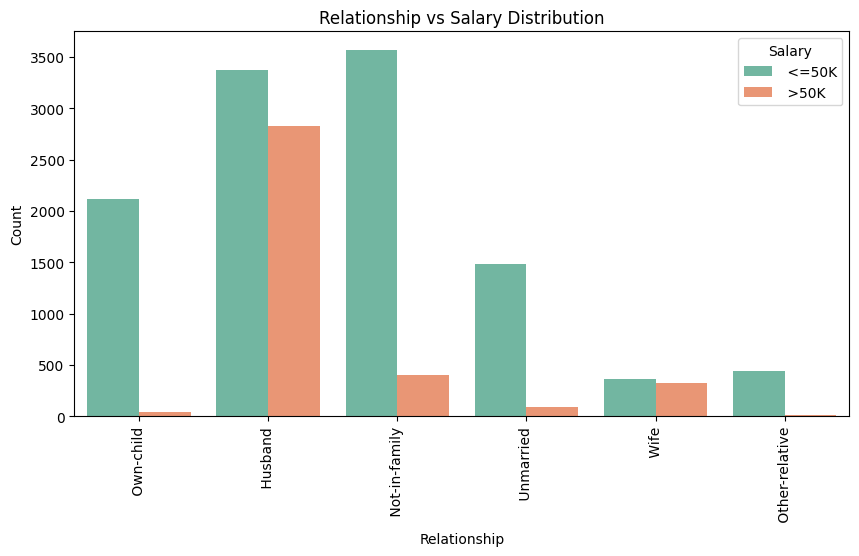

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'relationship', hue = 'Salary', palette = 'Set2')

plt.xlabel('Relationship')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Relationship vs Salary Distribution')
plt.legend(title='Salary')

**The Husband earn higher salaries (greater than 50K) compared to others.**

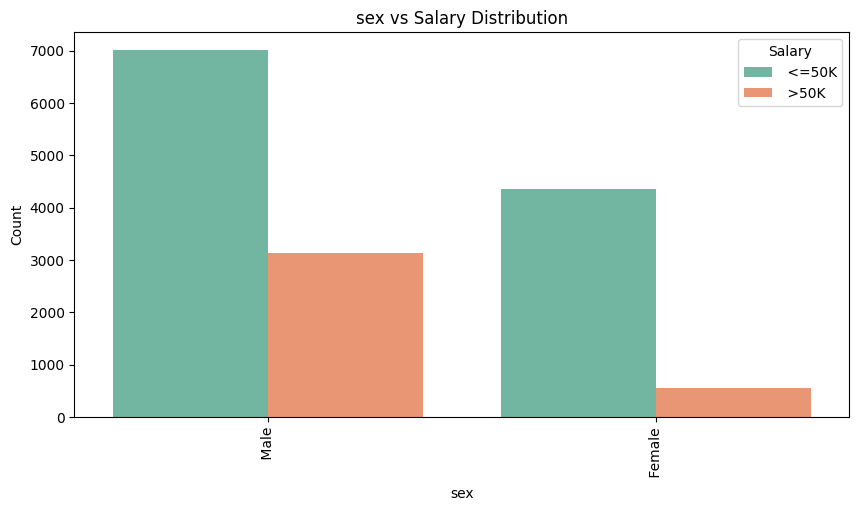

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'sex', hue = 'Salary', palette = 'Set2')

plt.xlabel('sex')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('sex vs Salary Distribution')
plt.legend(title='Salary')

**The Male earn higher salaries (greater than 50K) compared to others.**

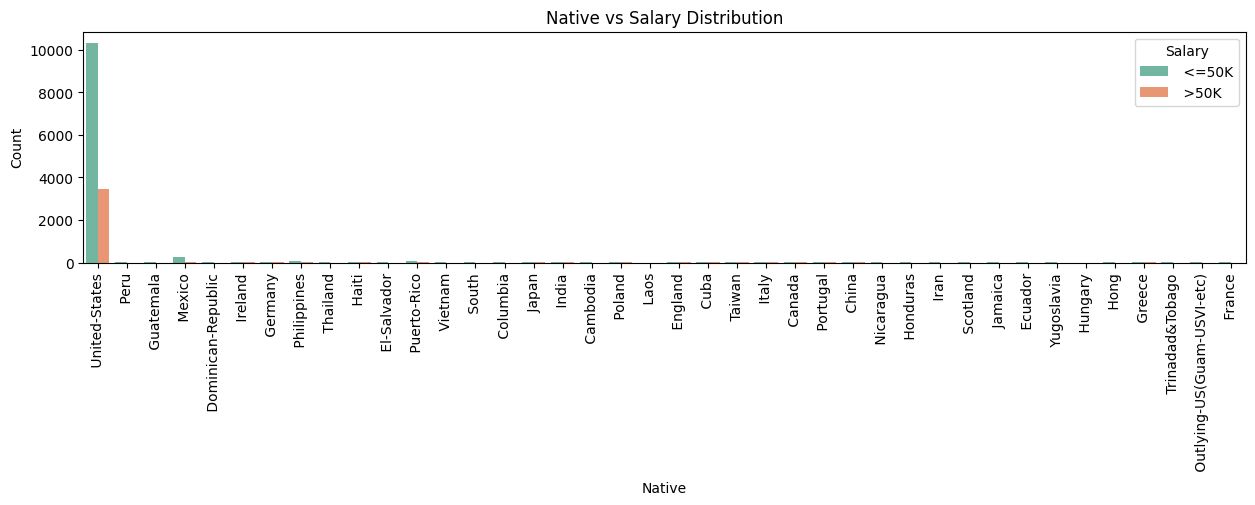

In [15]:
plt.figure(figsize=(15, 3))
sns.countplot(data = df, x = 'native', hue = 'Salary', palette = 'Set2')

plt.xlabel('Native')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Native vs Salary Distribution')
plt.legend(title='Salary')

**People located in the US receive high salaries compare to others**

**Univariate analysis**

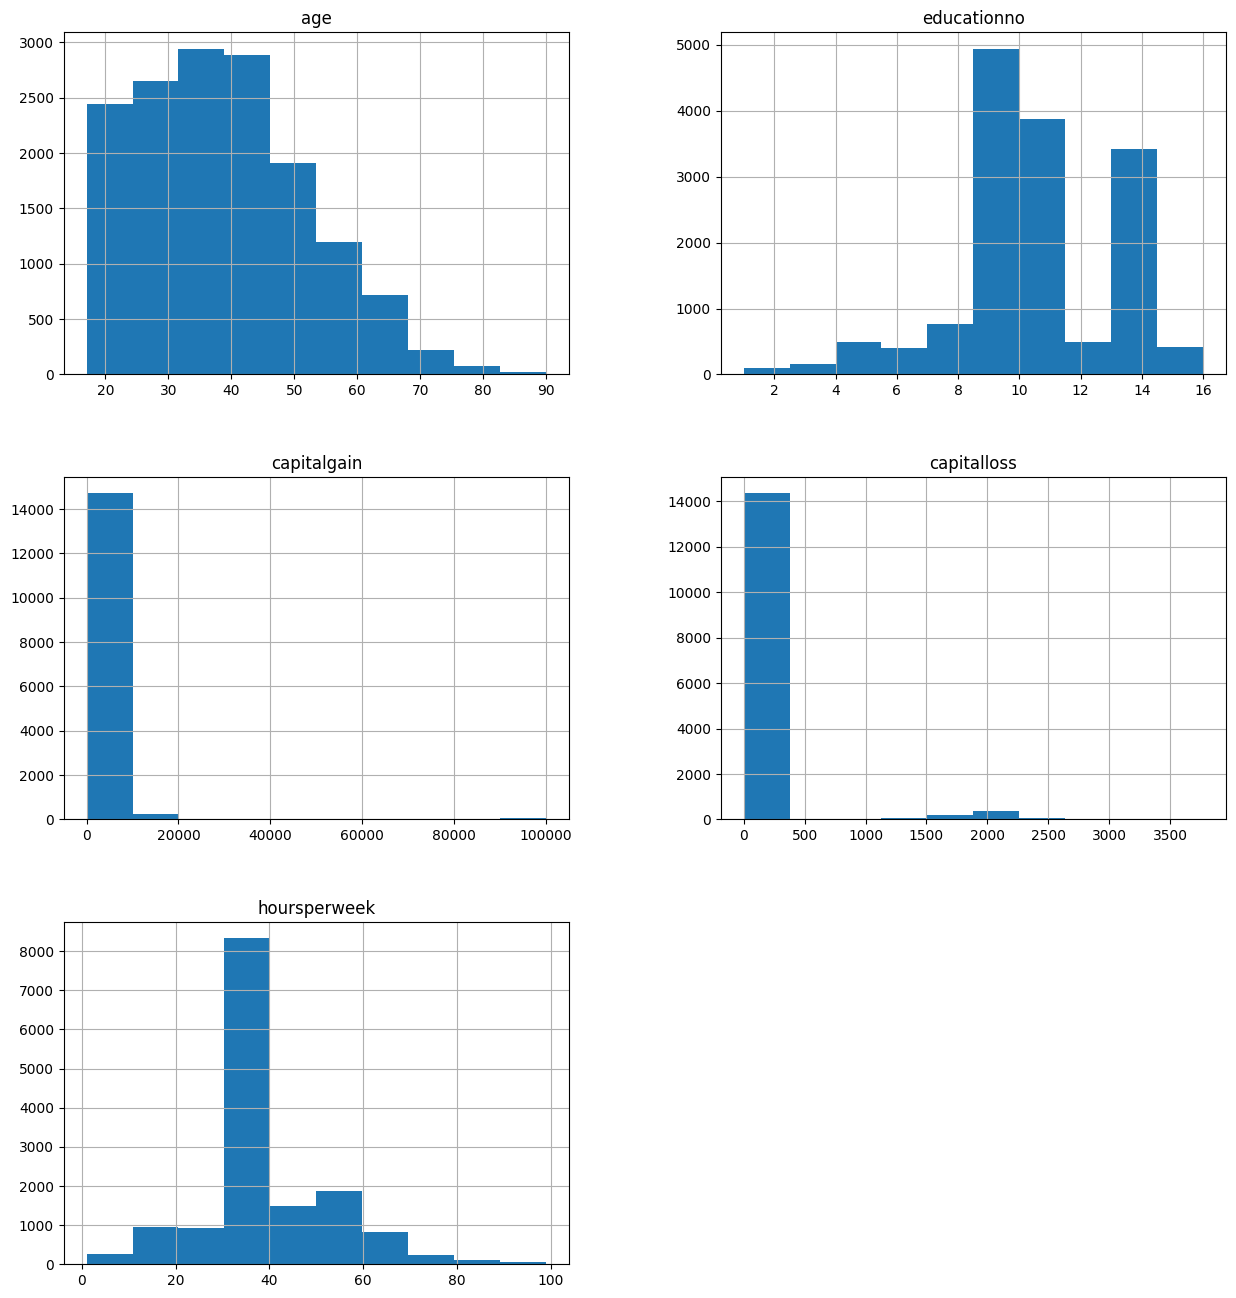

In [16]:
df.select_dtypes(exclude="object").hist(figsize=(15, 16))
plt.show()

- Most employees are between the ages of 20 and 45.
- The majority of employees have an education level in the 9 to 11 category, followed by a smaller group in the 13 to 15 range.
- Most capital gain and capital loss values are zero.
- The majority of employees work between 25 and 45 hours per week.

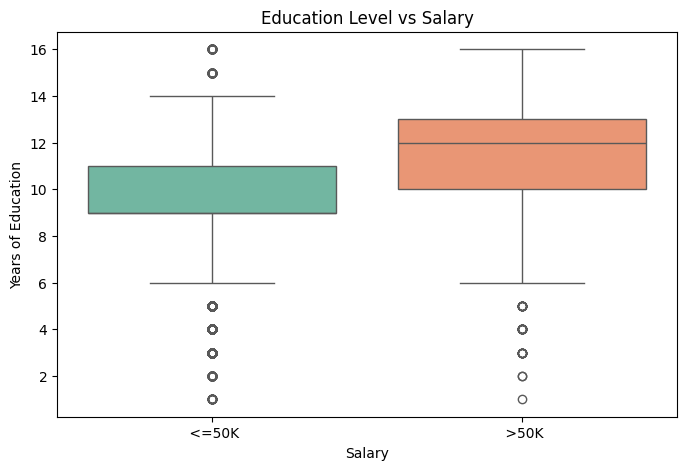

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Salary', y='educationno', data=df, palette='Set2')

# Labels and Title
plt.xlabel('Salary')
plt.ylabel('Years of Education')
plt.title('Education Level vs Salary')

plt.show()

**Eduction level increase salary aslo increase** 

In [18]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

# Data cleaning 

In [19]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


**PreProcess pipeLine**

In [20]:
PreProcessPipeline = Pipeline(steps=[
    ("DropWithoutPayFeatureValues", FunctionTransformer(FeatureMapping.drop_without_pay, validate=False)),
    ("ReplaceFeatureValues", FunctionTransformer(FeatureMapping.feature_values_replace, validate=False)),
    ("DropUnwantedColumns", FunctionTransformer(FeatureMapping.drop_columns, validate=False))
])

In [21]:
# save the PreProcessPipeline using joblib 

In [22]:
joblib.dump(PreProcessPipeline, 'PreProcessPipeline')

['PreProcessPipeline']

**Column Transformer OneHot and impute**

In [23]:
numericalColumns = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary'] # numerical columns
categoricalColumns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'sex'] # categorical columns

In [24]:
# numerical pipeLine
numericalPipeLine = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))]) 

# Categorical pipline 
categoricalPipeLine = Pipeline(steps = [('OneHotencode', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False, drop = 'first'))]) 

In [25]:
feature_transformer = ColumnTransformer([
    ('categorical', categoricalPipeLine, categoricalColumns), 
    ('numerical', numericalPipeLine, numericalColumns)
], remainder='passthrough')

In [26]:
joblib.dump(feature_transformer, 'featureTransformer')

['featureTransformer']

### Load the Joblib and transform the features 

**This preprocessesPipline the feature values and removes unwanted columns and rows.**

In [27]:
PreProcessPipeline = joblib.load('PreProcessPipeline')

In [28]:
df = PreProcessPipeline.fit_transform(df)

In [29]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private Sector,High School,7,Single,Manufacturing,Child,M,0,0,40,0
1,38,Private Sector,High School Graduate,9,Married,Agriculture,Spouse,M,0,0,50,0
2,28,Government,Associate Degree,12,Married,Security,Spouse,M,0,0,40,1
3,44,Private Sector,College,10,Married,Manufacturing,Spouse,M,7688,0,40,1
4,34,Private Sector,High School,6,Single,Service,Independent,M,0,0,30,0


**FeatureTransformer performs one-hot encoding and imputes missing values.**

In [30]:
featureTransformer = joblib.load('featureTransformer')

In [31]:
feature_transformer.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('OneHotencode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['workclass', 'education', 'maritalstatus',
                                  'occupation', 'relationship', 'sex']),
                                ('numerical',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['age', 'educationno', 'capitalgain',
                                  'capitalloss', 'hoursperweek', 'Salary'])])

In [32]:
clean_feature_names = [col.replace('categorical__', '').replace('numerical__', '') for col in feature_transformer.get_feature_names_out()]

In [33]:
df = pd.DataFrame(feature_transformer.transform(df), columns = clean_feature_names)

In [34]:
df.drop_duplicates(inplace = True)

In [35]:
df = df.astype(int)

In [36]:
df.head()

,workclass_Private Sector,workclass_Self-Employed,education_Bachelor’s Degree,education_College,education_Doctorate,education_High School,education_High School Graduate,education_Master’s Degree,education_Middle School,education_No Education,...,relationship_Independent,relationship_Single,relationship_Spouse,sex_M,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,25,7,0,0,40,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,38,9,0,0,50,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,28,12,0,0,40,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,44,10,7688,0,40,1
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,34,6,0,0,30,0


In [37]:
df.to_csv('preprocessTestData.csv', index=False)